In [2]:
import pandas as pd
import numpy as np

import os
import requests
import json

from ydata_profiling import ProfileReport # for EDA

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ruta_data = "../data/data_casal_montserratina/"

# Petición a la API de weatherbit 

In [4]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2022-01-01'
# end_date = '2022-12-31'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# #nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2022.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")  

{'app_temp': 10.7, 'azimuth': 323.5, 'clouds': 87, 'datetime': '2021-12-31:23', 'dewpt': 9.5, 'dhi': 0, 'dni': 0, 'elev_angle': -68.4, 'ghi': 0, 'h_angle': None, 'pod': 'n', 'precip': 0, 'pres': 1027, 'revision_status': 'final', 'rh': 92, 'slp': 1028, 'snow': 0, 'solar_rad': 0, 'temp': 10.7, 'timestamp_local': '2022-01-01T00:00:00', 'timestamp_utc': '2021-12-31T23:00:00', 'ts': 1640991600, 'uv': 0, 'vis': 11, 'weather': {'code': 804, 'icon': 'c04n', 'description': 'Overcast clouds'}, 'wind_dir': 360, 'wind_gust_spd': 4, 'wind_spd': 1}
Archivo .JSON guardado correctamente.


In [2]:
# #params
# lat = 41.32062    # casal de la montserratina
# lon = 2.0105984   # casal de la montserratina
# start_date = '2023-01-01'
# end_date = '2023-12-31'
# key = '721fef6a25f1470bbd45601158e5c711'   # Tu clave de API de Weatherbit

# # URL base de la API de Weatherbit
# history_hourly_URL = 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&tz=local&key={}'.format(lat, lon, start_date, end_date, key)
     
# # Realizar la solicitud GET a la API de Weatherbit
# response = requests.get(history_hourly_URL)

# # Verificar si la solicitud fue exitosa (código de estado 200)
# if response.status_code == 200:
#     # Convertir la respuesta a formato JSON
#     data = response.json()
    
#     # Imprimir la respuesta (en este ejemplo, solo mostramos el primer resultado)
#     print(data['data'][0])
# else:
#     # Si la solicitud no fue exitosa, imprimir el mensaje de error
#     print("Error al realizar la solicitud:", response.status_code)
# # nombre_archivo = "hourly_weather_lat={}&lon={}&start_date={}&end_date={}.json".format(lat, lon, start_date, end_date)
# nombre_archivo = "hourly_weather_2023.json"

# ruta_completa = os.path.join(ruta_data, nombre_archivo)

# # Guarda el diccionario como JSON en el archivo
# with open(ruta_completa, 'w') as archivo:
#     json.dump(data, archivo)

# print("Archivo .JSON guardado correctamente.")

# Lectura .JSON y desarollo del Dataframe

In [3]:
def load_json_file(ruta, nombre_archivo):

    # Concatenamos la ruta completa
    ruta_completa = os.path.join(ruta, nombre_archivo)

    # Abrimos el archivo y cargamos el JSON
    with open(ruta_completa) as archivo:
        datos = json.load(archivo)

    # Ahora `datos` contiene el contenido del archivo JSON
    # Puedes acceder a los datos como diccionario
    return datos

In [4]:
def format_df (json):
    # convert to DataFrame
    datos = json["data"] # Extraer los datos de la clave "data"

    # Convertir a DataFrame
    dataframe = pd.DataFrame(datos)

    # vienen muchas columnas, solo interesa quedarme con algunas
    columnas_deseadas = ["timestamp_local", "temp", "wind_spd", "dhi", "ghi", "dni", 'clouds', 'dewpt', 'rh', "uv"]

    # Seleccionar solo las columnas deseadas
    dataframe = dataframe.loc[:, columnas_deseadas]

    return dataframe

In [5]:
# Load the JSON file
nombre_archivo_2022 = "hourly_weather_2022.json"

json_2022 = load_json_file(ruta_data, nombre_archivo_2022)
df_2022 = format_df(json_2022)

In [6]:
nombre_archivo_2023 = "hourly_weather_2023.json"

json_2023 = load_json_file(ruta_data, nombre_archivo_2023)
df_2023 = format_df(json_2023)

In [7]:
df_2022.head(3)

,timestamp_local,temp,wind_spd,dhi,ghi,dni,clouds,dewpt,rh
0,2022-01-01T00:00:00,10.7,1.0,0,0,0,87,9.5,92
1,2022-01-01T01:00:00,10.7,2.6,0,0,0,62,8.8,88
2,2022-01-01T02:00:00,10.7,2.6,0,0,0,87,9.0,89


In [8]:
df_2023.head(3)

,timestamp_local,temp,wind_spd,dhi,ghi,dni,clouds,dewpt,rh
0,2023-01-01T00:00:00,11.0,2.0,0,0,0,62,7.9,81
1,2023-01-01T01:00:00,10.0,1.0,0,0,0,12,7.3,83
2,2023-01-01T02:00:00,9.5,3.1,0,0,0,17,6.0,79


In [9]:
# hago un concat de los dos dataframes
df = pd.concat([df_2022, df_2023])
df

,timestamp_local,temp,wind_spd,dhi,ghi,dni,clouds,dewpt,rh
0,2022-01-01T00:00:00,10.7,1.00,0,0,0,87,9.5,92
1,2022-01-01T01:00:00,10.7,2.60,0,0,0,62,8.8,88
2,2022-01-01T02:00:00,10.7,2.60,0,0,0,87,9.0,89
3,2022-01-01T03:00:00,10.2,2.60,0,0,0,68,8.5,89
4,2022-01-01T04:00:00,10.5,1.50,0,0,0,75,9.3,92
...,...,...,...,...,...,...,...,...,...
8731,2023-12-30T19:00:00,11.2,2.10,0,0,0,0,7.5,78
8732,2023-12-30T20:00:00,10.7,2.60,0,0,0,0,6.5,75
8733,2023-12-30T21:00:00,10.7,3.10,0,0,0,0,6.6,76
8734,2023-12-30T22:00:00,10.6,4.59,0,0,0,0,6.6,76


# Analisis del DF resultante

In [11]:
# Convertir la columna "fecha" a datetime
df["timestamp_local"] = pd.to_datetime(df["timestamp_local"], format="%Y-%m-%dT%H:%M:%S")
#df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], format="%Y-%m-%dT%H:%M:%S")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17472 entries, 0 to 8735
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp_local  17472 non-null  datetime64[ns]
 1   temp             17472 non-null  float64       
 2   wind_spd         17472 non-null  float64       
 3   dhi              17472 non-null  int64         
 4   ghi              17472 non-null  int64         
 5   dni              17472 non-null  int64         
 6   clouds           17472 non-null  int64         
 7   dewpt            17472 non-null  float64       
 8   rh               17472 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 1.3 MB


In [13]:
# # Generate the report
# profile = ProfileReport(df,title="hourly_weather_2022_2023", tsmode=True, sortby="timestamp_local")

# # Save the report to .html
# profile.to_file("hourly_weather_2022_2023.html")

# profile

no se observan duplicados, NaNs, faltantes, etc.... el df está muy limpio.


Variable Weatherbit      Descripción                                       Unidades 
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
timestamp_local          Timestamp en la hora local  
timestamp_utc            Timestamp en UTC 
temp                     Temperatura                                        Celsius (por defecto) 
wind_spd                 Velocidad del viento                               m/s (por defecto) 
dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

# Armonizacion de unidades de Medida

para evitar incongreuencia con las unidades, las agrego al nombre de la variable. ya veré si es necesario mantenerla en las mismas unidades o cambiarlas mediante => Irradiancia[kW/m2] = Irradiancia[W/m2]/1000;



In [14]:
df = df.rename(columns={"temp": "temp [C]", "wind_spd": "wind_spd [m/s]", 
                        "dhi": "dhi [W/m^2]", "ghi": "ghi [W/m^2]", "dni": "dni [W/m^2]", 'clouds': 'clouds [%]', 'dewpt': 'dewpt [C]', 'rh': 'rh [%]'})
df.sample(5)

,timestamp_local,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%]
4274,2023-06-28 03:00:00,23.9,1.00,0,0,0,25,20.8,83
6257,2022-09-18 18:00:00,24.7,3.60,78,308,674,25,15.3,56
5801,2023-08-30 18:00:00,25.0,5.09,87,411,736,37,19.4,71
2804,2023-04-27 21:00:00,19.0,3.60,0,0,0,17,16.0,83
8166,2022-12-07 06:00:00,8.7,4.59,0,0,0,17,6.0,83


# Resample - Cambiar frecuencia horaria a cuarto-horaria

In [15]:
df

,timestamp_local,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%]
0,2022-01-01 00:00:00,10.7,1.00,0,0,0,87,9.5,92
1,2022-01-01 01:00:00,10.7,2.60,0,0,0,62,8.8,88
2,2022-01-01 02:00:00,10.7,2.60,0,0,0,87,9.0,89
3,2022-01-01 03:00:00,10.2,2.60,0,0,0,68,8.5,89
4,2022-01-01 04:00:00,10.5,1.50,0,0,0,75,9.3,92
...,...,...,...,...,...,...,...,...,...
8731,2023-12-30 19:00:00,11.2,2.10,0,0,0,0,7.5,78
8732,2023-12-30 20:00:00,10.7,2.60,0,0,0,0,6.5,75
8733,2023-12-30 21:00:00,10.7,3.10,0,0,0,0,6.6,76
8734,2023-12-30 22:00:00,10.6,4.59,0,0,0,0,6.6,76


In [16]:
df.set_index("timestamp_local", inplace=True)

In [17]:
df.head()

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%]
timestamp_local,,,,,,,,
2022-01-01 00:00:00,10.7,1.0,0,0,0,87,9.5,92
2022-01-01 01:00:00,10.7,2.6,0,0,0,62,8.8,88
2022-01-01 02:00:00,10.7,2.6,0,0,0,87,9.0,89
2022-01-01 03:00:00,10.2,2.6,0,0,0,68,8.5,89
2022-01-01 04:00:00,10.5,1.5,0,0,0,75,9.3,92


In [18]:
df_upsampled = df.groupby(level=0).first()
df_upsampled = df_upsampled.resample('15T').interpolate(method='linear')
df_upsampled.head()

C:\Users\afernandez\AppData\Local\Temp\ipykernel_34104\2197191081.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_upsampled = df_upsampled.resample('15T').interpolate(method='linear')


,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%]
timestamp_local,,,,,,,,
2022-01-01 00:00:00,10.7,1.0,0.0,0.0,0.0,87.00,9.500,92.0
2022-01-01 00:15:00,10.7,1.4,0.0,0.0,0.0,80.75,9.325,91.0
2022-01-01 00:30:00,10.7,1.8,0.0,0.0,0.0,74.50,9.150,90.0
2022-01-01 00:45:00,10.7,2.2,0.0,0.0,0.0,68.25,8.975,89.0
2022-01-01 01:00:00,10.7,2.6,0.0,0.0,0.0,62.00,8.800,88.0


In [19]:
df_upsampled.tail()

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%]
timestamp_local,,,,,,,,
2023-12-30 22:00:00,10.600,4.5900,0.0,0.0,0.0,0.0,6.600,76.00
2023-12-30 22:15:00,9.875,3.6925,0.0,0.0,0.0,0.0,6.275,78.25
2023-12-30 22:30:00,9.150,2.7950,0.0,0.0,0.0,0.0,5.950,80.50
2023-12-30 22:45:00,8.425,1.8975,0.0,0.0,0.0,0.0,5.625,82.75
2023-12-30 23:00:00,7.700,1.0000,0.0,0.0,0.0,0.0,5.300,85.00


# Estimación de la producción solar de un sistema fotovoltaico

Primero se calcula el parametro TM(t) que corresponde a la temperatura interior de los Modulos/placas a tiempo t.

La temperatura interior del m'odulo viene dada por  >>>> TM[i] = 17.23292 + 0.451708 * t_out[i] + 0.022706 * irr[i]

Donde:     
- t_out <-> temp ambiente (temp) [°C]
 
-  irr   <-> Irradiancia directa normal (dni) [kW/m2] 

In [22]:
df_upsampled["Temp interna Modulo"] = 17.23292 + 0.451708 * df_upsampled["temp [C]"] + 0.022706 * df_upsampled["dni [W/m^2]"]

In [23]:
df_upsampled.sample(10)

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo
timestamp_local,,,,,,,,,
2022-06-22 08:30:00,22.850,2.8500,77.00,322.50,663.50,51.50,19.000,79.00,42.619879
2023-05-15 00:45:00,15.275,2.4750,0.00,0.00,0.00,25.00,12.675,84.50,24.132760
2022-07-15 15:00:00,30.900,6.7000,121.00,946.00,911.00,10.00,23.800,66.00,51.875863
2023-10-05 08:00:00,20.600,4.0900,9.00,3.00,28.00,75.00,17.400,82.00,27.173873
2023-09-03 17:15:00,27.950,13.4000,96.50,526.75,790.25,27.00,17.575,53.50,47.801575
2022-05-20 04:00:00,19.000,4.5900,0.00,0.00,0.00,0.00,13.000,68.00,25.815372
2023-04-15 22:30:00,14.050,2.6000,0.00,0.00,0.00,18.50,9.000,71.50,23.579417
2023-09-10 13:15:00,26.025,3.4750,115.25,812.75,892.25,21.75,19.575,67.75,49.248049
2022-09-07 10:15:00,26.450,3.9725,93.25,480.00,770.75,31.25,19.750,66.75,46.681246


luego se introduce la formula de generacion electrica de una placa solar

PV[i] = max(0, (((-0.062059 * irr[i] + 0.04277774) * TM[i] + 9.692792 * irr[i] - 1.885868)) * (PPv / 6.6))

donde:
- PV[i]     es la generacion electrica de una placa solar en las condiciones dadas. supongo que las unidades son [Kw]
- PPv       es la Potencia instalada / potencia máxima de generación [kW]
- irr[i]    es la Irradiancia directa normal [kW/m2] 
- TM[i]     es la temperatura interna del modulo/placa solar
 

In [24]:
PPvn = 5000 # 5Kw = 5000 watts
irr = df_upsampled["dni [W/m^2]"]
TM = df_upsampled["Temp interna Modulo"]

df_upsampled["PV"] = (np.maximum(0, ((-0.062059 * irr + 0.04277774)* TM) + 9.692792 * irr - 1.885868 )* PPvn) / 6.6

In [25]:
df_upsampled.sample(5)

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo,PV
timestamp_local,,,,,,,,,,
2022-04-25 01:00:00,14.700,2.60,0.0,0.0,0.0,25.0,10.1,74.0,23.873028,0.000000e+00
2022-12-17 14:30:00,14.200,2.10,81.5,326.0,704.0,77.5,9.8,75.0,39.632198,3.857593e+06
2022-04-10 03:30:00,12.600,1.80,0.0,0.0,0.0,43.5,8.5,76.0,22.924441,0.000000e+00
2022-07-27 11:30:00,26.900,3.35,112.5,784.5,872.0,68.5,20.5,68.0,49.183497,4.386929e+06
2022-08-08 22:45:00,28.425,1.00,0.0,0.0,0.0,12.0,20.3,61.5,30.072720,0.000000e+00


In [26]:
# Calcular la suma de la producción solar por día y asignar a una nueva columna
df_upsampled['suma_produccion_diaria'] = df_upsampled.groupby(df_upsampled.index)['PV'].transform('cumsum')

## outliers

In [28]:
df_PV =df_upsampled.copy()

In [29]:
df_PV

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo,PV,suma_produccion_diaria
timestamp_local,,,,,,,,,,,
2022-01-01 00:00:00,10.700,1.0000,0.0,0.0,0.0,87.00,9.500,92.00,22.066196,0.0,0.0
2022-01-01 00:15:00,10.700,1.4000,0.0,0.0,0.0,80.75,9.325,91.00,22.066196,0.0,0.0
2022-01-01 00:30:00,10.700,1.8000,0.0,0.0,0.0,74.50,9.150,90.00,22.066196,0.0,0.0
2022-01-01 00:45:00,10.700,2.2000,0.0,0.0,0.0,68.25,8.975,89.00,22.066196,0.0,0.0
2022-01-01 01:00:00,10.700,2.6000,0.0,0.0,0.0,62.00,8.800,88.00,22.066196,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 22:00:00,10.600,4.5900,0.0,0.0,0.0,0.00,6.600,76.00,22.021025,0.0,0.0
2023-12-30 22:15:00,9.875,3.6925,0.0,0.0,0.0,0.00,6.275,78.25,21.693537,0.0,0.0
2023-12-30 22:30:00,9.150,2.7950,0.0,0.0,0.0,0.00,5.950,80.50,21.366048,0.0,0.0


In [30]:
df_PV.describe()

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo,PV,suma_produccion_diaria
count,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,6.998100e+04,6.998100e+04
mean,18.089667,4.099553,42.801332,231.780398,348.589703,29.039818,11.910704,68.618632,33.319245,1.841855e+06,1.841855e+06
std,6.942605,2.117319,46.949240,305.828273,376.474965,21.670552,7.147535,13.437091,10.131492,1.957698e+06,1.957698e+06
min,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.100000,10.000000,17.007066,0.000000e+00,0.000000e+00
25%,12.750000,2.600000,0.000000,0.000000,0.000000,15.250000,6.800000,60.000000,24.189223,0.000000e+00,0.000000e+00
50%,18.000000,3.722500,14.250000,19.500000,113.000000,25.000000,12.000000,70.000000,29.396959,6.793688e+05,6.793688e+05
75%,24.025000,5.090000,91.000000,438.000000,762.750000,32.750000,17.900000,78.750000,43.026114,4.058418e+06,4.058418e+06
max,34.700000,15.900000,123.000000,991.000000,924.000000,100.000000,26.700000,98.000000,53.388000,4.920826e+06,4.920826e+06


In [31]:
#Outliers
def getNumberOfOutliersPerColumn(df, columns_list):
    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        #Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        print(f"For {col} Column, the Number of Outliers is {outliers.sum()}\n")

cols = df_PV.columns.values
getNumberOfOutliersPerColumn(df_PV, cols  )

For temp [C] Column, the Number of Outliers is 0

For wind_spd [m/s] Column, the Number of Outliers is 2442

For dhi [W/m^2] Column, the Number of Outliers is 0

For ghi [W/m^2] Column, the Number of Outliers is 0

For dni [W/m^2] Column, the Number of Outliers is 0

For clouds [%] Column, the Number of Outliers is 8257

For dewpt [C] Column, the Number of Outliers is 86

For rh [%] Column, the Number of Outliers is 593

For Temp interna Modulo Column, the Number of Outliers is 0

For PV Column, the Number of Outliers is 0

For suma_produccion_diaria Column, the Number of Outliers is 0



tiene sentido lo que se lee... que el viento sea muy racheado es normal. vientos de 15 m/s son casi 54 km/h!

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


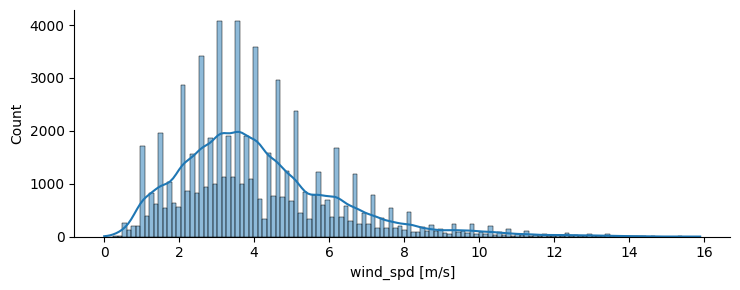

In [32]:
sns.displot(data=df_PV["wind_spd [m/s]"], kde=True, height=3, aspect= 2.5 );

In [33]:
# puedo reemplazar los outliteres superiores por una interpolacion lineal del valor anterior y posterior

# defino limites
q1 = df_PV["wind_spd [m/s]"].quantile(0.25)
q3 = df_PV["wind_spd [m/s]"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

# reemplazo outliers por NaNs   
df_PV.loc[(df_PV['wind_spd [m/s]'] > lim_sup), 'wind_spd [m/s]'] = pd.NA

# Interpolate NaN values with linear interpolation
df_PV['wind_spd [m/s]'] = df_PV['wind_spd [m/s]'].interpolate(method='linear')

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


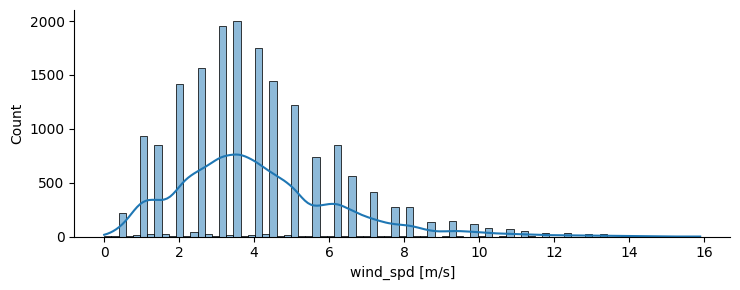

In [34]:
sns.displot(data=df["wind_spd [m/s]"], kde=True, height=3, aspect= 2.5 );

In [35]:
getNumberOfOutliersPerColumn(df_PV, df_PV.columns.values)

For temp [C] Column, the Number of Outliers is 0

For wind_spd [m/s] Column, the Number of Outliers is 0

For dhi [W/m^2] Column, the Number of Outliers is 0

For ghi [W/m^2] Column, the Number of Outliers is 0

For dni [W/m^2] Column, the Number of Outliers is 0

For clouds [%] Column, the Number of Outliers is 8257

For dewpt [C] Column, the Number of Outliers is 86

For rh [%] Column, the Number of Outliers is 593

For Temp interna Modulo Column, the Number of Outliers is 0

For PV Column, the Number of Outliers is 0

For suma_produccion_diaria Column, the Number of Outliers is 0



In [36]:
display(df_PV.describe())

,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo,PV,suma_produccion_diaria
count,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,69981.000000,6.998100e+04,6.998100e+04
mean,18.089667,4.030424,42.801332,231.780398,348.589703,29.039818,11.910704,68.618632,33.319245,1.841855e+06,1.841855e+06
std,6.942605,1.915610,46.949240,305.828273,376.474965,21.670552,7.147535,13.437091,10.131492,1.957698e+06,1.957698e+06
min,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.100000,10.000000,17.007066,0.000000e+00,0.000000e+00
25%,12.750000,2.600000,0.000000,0.000000,0.000000,15.250000,6.800000,60.000000,24.189223,0.000000e+00,0.000000e+00
50%,18.000000,3.722500,14.250000,19.500000,113.000000,25.000000,12.000000,70.000000,29.396959,6.793688e+05,6.793688e+05
75%,24.025000,5.090000,91.000000,438.000000,762.750000,32.750000,17.900000,78.750000,43.026114,4.058418e+06,4.058418e+06
max,34.700000,8.810000,123.000000,991.000000,924.000000,100.000000,26.700000,98.000000,53.388000,4.920826e+06,4.920826e+06


ya no hay outliers :)

## Exogenous variables

In [37]:
df_PV.reset_index(inplace=True)

In [38]:
df_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69981 entries, 0 to 69980
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp_local         69981 non-null  datetime64[ns]
 1   temp [C]                69981 non-null  float64       
 2   wind_spd [m/s]          69981 non-null  float64       
 3   dhi [W/m^2]             69981 non-null  float64       
 4   ghi [W/m^2]             69981 non-null  float64       
 5   dni [W/m^2]             69981 non-null  float64       
 6   clouds [%]              69981 non-null  float64       
 7   dewpt [C]               69981 non-null  float64       
 8   rh [%]                  69981 non-null  float64       
 9   Temp interna Modulo     69981 non-null  float64       
 10  PV                      69981 non-null  float64       
 11  suma_produccion_diaria  69981 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage

In [39]:
df_PV["Year"] = df_PV["timestamp_local"].dt.year
df_PV["Month"] = df_PV["timestamp_local"].dt.month
df_PV["Hour"] = df_PV["timestamp_local"].dt.hour
df_PV["DayOfWeek"] = df_PV["timestamp_local"].dt.day_of_week
df_PV["DayOfYear"] = df_PV["timestamp_local"].dt.day_of_year
df_PV["Day"] = df_PV["timestamp_local"].dt.day
df_PV["Minute"] = df_PV["timestamp_local"].dt.minute

In [40]:
df_PV

,timestamp_local,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo,PV,suma_produccion_diaria,Year,Month,Hour,DayOfWeek,DayOfYear,Day,Minute
0,2022-01-01 00:00:00,10.700,1.0000,0.0,0.0,0.0,87.00,9.500,92.00,22.066196,0.0,0.0,2022,1,0,5,1,1,0
1,2022-01-01 00:15:00,10.700,1.4000,0.0,0.0,0.0,80.75,9.325,91.00,22.066196,0.0,0.0,2022,1,0,5,1,1,15
2,2022-01-01 00:30:00,10.700,1.8000,0.0,0.0,0.0,74.50,9.150,90.00,22.066196,0.0,0.0,2022,1,0,5,1,1,30
3,2022-01-01 00:45:00,10.700,2.2000,0.0,0.0,0.0,68.25,8.975,89.00,22.066196,0.0,0.0,2022,1,0,5,1,1,45
4,2022-01-01 01:00:00,10.700,2.6000,0.0,0.0,0.0,62.00,8.800,88.00,22.066196,0.0,0.0,2022,1,1,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69976,2023-12-30 22:00:00,10.600,4.5900,0.0,0.0,0.0,0.00,6.600,76.00,22.021025,0.0,0.0,2023,12,22,5,364,30,0
69977,2023-12-30 22:15:00,9.875,3.6925,0.0,0.0,0.0,0.00,6.275,78.25,21.693537,0.0,0.0,2023,12,22,5,364,30,15
69978,2023-12-30 22:30:00,9.150,2.7950,0.0,0.0,0.0,0.00,5.950,80.50,21.366048,0.0,0.0,2023,12,22,5,364,30,30
69979,2023-12-30 22:45:00,8.425,1.8975,0.0,0.0,0.0,0.00,5.625,82.75,21.038560,0.0,0.0,2023,12,22,5,364,30,45


# Some Plots

Text(0.5, 0.98, '')

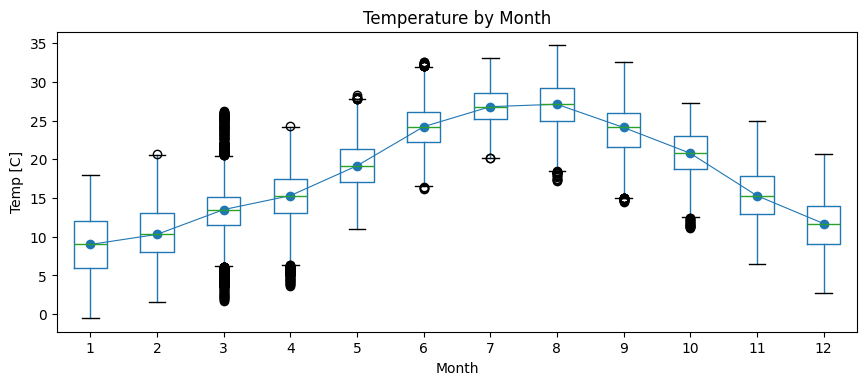

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='temp [C]', by='Month', ax=ax)
df_PV.groupby('Month')['temp [C]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Temp [C]')
ax.set_title("Temperature by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

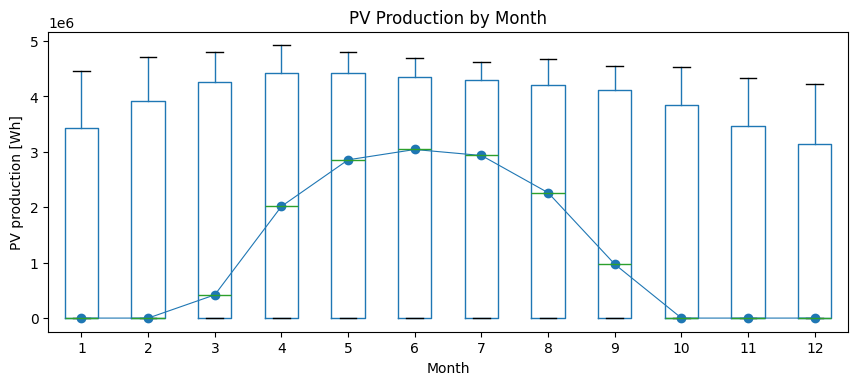

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV', by='Month', ax=ax)
df_PV.groupby('Month')['PV'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('PV production [Wh]')
ax.set_title("PV Production by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

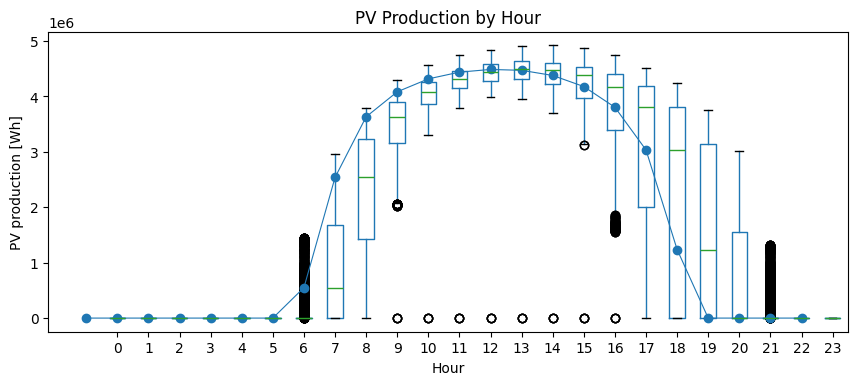

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
df_PV.boxplot(column='PV', by='Hour', ax=ax)
df_PV.groupby('Hour')['PV'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('PV production [Wh]')
ax.set_title("PV Production by Hour")
fig.suptitle('')

Text(0.5, 0.98, '')

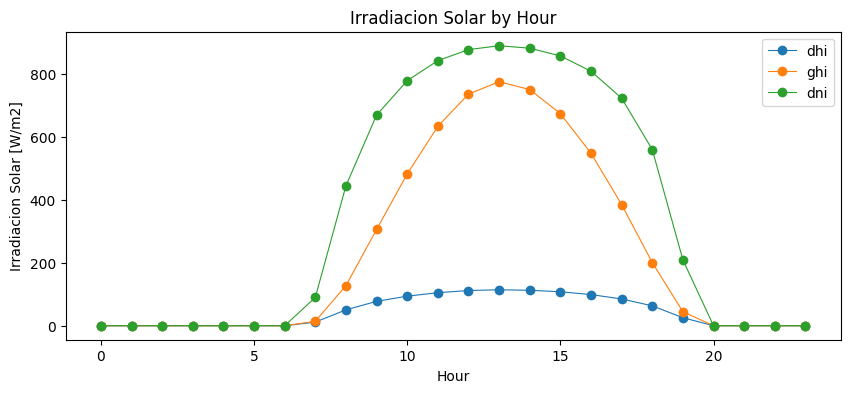

In [45]:
fig, ax = plt.subplots(figsize=(10, 4))

# df_PV.boxplot(column='dhi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dhi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='ghi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['ghi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='dni [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dni [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m2]')
ax.set_title("Irradiacion Solar by Hour")
fig.suptitle('')

# DF para mergerar con Consumo

In [46]:
df_PV

,timestamp_local,temp [C],wind_spd [m/s],dhi [W/m^2],ghi [W/m^2],dni [W/m^2],clouds [%],dewpt [C],rh [%],Temp interna Modulo,PV,suma_produccion_diaria,Year,Month,Hour,DayOfWeek,DayOfYear,Day,Minute
0,2022-01-01 00:00:00,10.700,1.0000,0.0,0.0,0.0,87.00,9.500,92.00,22.066196,0.0,0.0,2022,1,0,5,1,1,0
1,2022-01-01 00:15:00,10.700,1.4000,0.0,0.0,0.0,80.75,9.325,91.00,22.066196,0.0,0.0,2022,1,0,5,1,1,15
2,2022-01-01 00:30:00,10.700,1.8000,0.0,0.0,0.0,74.50,9.150,90.00,22.066196,0.0,0.0,2022,1,0,5,1,1,30
3,2022-01-01 00:45:00,10.700,2.2000,0.0,0.0,0.0,68.25,8.975,89.00,22.066196,0.0,0.0,2022,1,0,5,1,1,45
4,2022-01-01 01:00:00,10.700,2.6000,0.0,0.0,0.0,62.00,8.800,88.00,22.066196,0.0,0.0,2022,1,1,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69976,2023-12-30 22:00:00,10.600,4.5900,0.0,0.0,0.0,0.00,6.600,76.00,22.021025,0.0,0.0,2023,12,22,5,364,30,0
69977,2023-12-30 22:15:00,9.875,3.6925,0.0,0.0,0.0,0.00,6.275,78.25,21.693537,0.0,0.0,2023,12,22,5,364,30,15
69978,2023-12-30 22:30:00,9.150,2.7950,0.0,0.0,0.0,0.00,5.950,80.50,21.366048,0.0,0.0,2023,12,22,5,364,30,30
69979,2023-12-30 22:45:00,8.425,1.8975,0.0,0.0,0.0,0.00,5.625,82.75,21.038560,0.0,0.0,2023,12,22,5,364,30,45


In [48]:
# Guardar el DataFrame como CSV
nombre_archivo = "LaMonserratina_weather_&_PV_2022_2023.pkl"
ruta_completa = os.path.join(ruta_data, nombre_archivo)

df_PV.to_pickle(ruta_completa)